## Import

In [4]:
import pandas as pd
import numpy as np

# 데이터 합치기

In [5]:
file_list_place = ['Dataset\수도권_방문지_데이터_1.csv','Dataset\수도권_방문지_데이터_2.csv',"Dataset\동부권_관광지_데이터_1.csv"
                   ,"Dataset\동부권_관광지_데이터_2.csv","Dataset\서부권_관광지_데이터_1.csv","Dataset\서부권_관광지_데이터_2.csv"
                   ,"Dataset\제주도및도서지역_관광지_데이터_1.csv","Dataset\제주도및도서지역_관광지_데이터_2.csv"]
file_list_user = [
    'Dataset\수도권_여행객_데이터_1.csv',
    'Dataset\수도권_여행객_데이터_2.csv',
    'Dataset\동부권_여행객_데이터_1.csv',
    'Dataset\동부권_여행객_데이터_2.csv',
    'Dataset\서부권_여행객_데이터_1.csv',
    'Dataset\서부권_여행객_데이터_2.csv',
    'Dataset\제주도및도서지역_여행객_데이터_1.csv',
    'Dataset\제주도및도서지역_여행객_데이터_2.csv'
]

dfs_place = [pd.read_csv(file) for file in file_list_place]
dfs_user = [pd.read_csv(file) for file in file_list_user]

merged_df_p = pd.concat(dfs_place, ignore_index=True)
merged_df_u = pd.concat(dfs_user, ignore_index=True)

merged_df_p.to_csv('Dataset\통합_방문지데이터.csv', index=False)
merged_df_u.to_csv('Dataset\통합_여행객데이터.csv', index=False)

C:\Users\kwonh\AppData\Local\Temp\ipykernel_19260\1990792255.py:15: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs_place = [pd.read_csv(file) for file in file_list_place]
C:\Users\kwonh\AppData\Local\Temp\ipykernel_19260\1990792255.py:15: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs_place = [pd.read_csv(file) for file in file_list_place]
C:\Users\kwonh\AppData\Local\Temp\ipykernel_19260\1990792255.py:15: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs_place = [pd.read_csv(file) for file in file_list_place]


# 방문지 데이터 전처리 진행

In [6]:
df1 = pd.read_csv('Dataset\통합_방문지데이터.csv')

C:\Users\kwonh\AppData\Local\Temp\ipykernel_19260\3612745937.py:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Dataset\통합_방문지데이터.csv')


## 필요없는 칼럼 삭제

In [7]:
df1_copy = df1.copy()
df1_copy = df1_copy.drop(['VISIT_AREA_ID','VISIT_ORDER','VISIT_START_YMD','VISIT_END_YMD','X_COORD',
                          'Y_COORD','ROAD_NM_CD','LOTNO_CD','POI_ID','POI_NM',
                          'REVISIT_YN','VISIT_CHC_REASON_CD','LODGING_TYPE_CD','SGG_CD'], axis=1)
print(df1_copy.head())

   TRAVEL_ID VISIT_AREA_NM        ROAD_NM_ADDR           LOTNO_ADDR  \
0  a_a015688        프로방스마을  경기 파주시 탄현면 새오리로 77  경기 파주시 탄현면 성동리 82-1   
1  a_a000164        친구/친지집                 NaN       경기도 안산시 단원구 와동   
2  a_a004293       병점역 1호선      경기 화성시 떡전골로 97     경기 화성시 진안동 824-1   
3  a_a000491         더현대서울    서울 영등포구 여의대로 108      서울 영등포구 여의도동 22   
4  a_a000172        강릉중앙시장       강원 강릉시 금성로 21        강원 강릉시 성남동 50   

   RESIDENCE_TIME_MIN  VISIT_AREA_TYPE_CD  DGSTFN  REVISIT_INTENTION  \
0                60.0                   7     4.0                4.0   
1                 NaN                  22     NaN                NaN   
2                30.0                   9     4.0                5.0   
3               180.0                   4     5.0                5.0   
4                30.0                   4     4.0                4.0   

   RCMDTN_INTENTION  
0               4.0  
1               NaN  
2               5.0  
3               5.0  
4               4.0  


## 이동수단 삭제

In [8]:
df1_copy = df1_copy[df1_copy['VISIT_AREA_TYPE_CD'] != 9]

## 집, 숙소, 친구/친지집 삭제

In [9]:
removeValue = ['집', '숙소', '친구/친지집']
df_filtered = df1_copy[~df1_copy['VISIT_AREA_NM'].isin(removeValue)]

In [10]:
print(df_filtered.head())

   TRAVEL_ID VISIT_AREA_NM        ROAD_NM_ADDR           LOTNO_ADDR  \
0  a_a015688        프로방스마을  경기 파주시 탄현면 새오리로 77  경기 파주시 탄현면 성동리 82-1   
3  a_a000491         더현대서울    서울 영등포구 여의대로 108      서울 영등포구 여의도동 22   
4  a_a000172        강릉중앙시장       강원 강릉시 금성로 21        강원 강릉시 성남동 50   
5  a_a000554           청계천                 NaN       서울 종로구 서린동 148   
7  a_a017850       송내역 1호선      경기 부천시 송내대로 43     경기 부천시 송내동 632-4   

   RESIDENCE_TIME_MIN  VISIT_AREA_TYPE_CD  DGSTFN  REVISIT_INTENTION  \
0                60.0                   7     4.0                4.0   
3               180.0                   4     5.0                5.0   
4                30.0                   4     4.0                4.0   
5                60.0                   7     4.0                4.0   
7               210.0                  22     NaN                NaN   

   RCMDTN_INTENTION  
0               4.0  
3               5.0  
4               4.0  
5               4.0  
7               NaN  


## 아파트, 오피스텔, 지하철, 펜션, 호텔값, 친척집, 사무실 제거

In [11]:
df_filtered = df_filtered[~df_filtered['VISIT_AREA_NM'].str.contains('아파트|오피스텔|호선|펜션|호텔|친척집|사무실|터미널|정류장|공항')]
print(df_filtered.head(10))

    TRAVEL_ID VISIT_AREA_NM        ROAD_NM_ADDR             LOTNO_ADDR  \
0   a_a015688        프로방스마을  경기 파주시 탄현면 새오리로 77    경기 파주시 탄현면 성동리 82-1   
3   a_a000491         더현대서울    서울 영등포구 여의대로 108        서울 영등포구 여의도동 22   
4   a_a000172        강릉중앙시장       강원 강릉시 금성로 21          강원 강릉시 성남동 50   
5   a_a000554           청계천                 NaN         서울 종로구 서린동 148   
8   a_a006024         장안순대국  경기 수원시 팔달구 화서문로 58    경기 수원시 팔달구 신풍동 25-1   
10  a_a003557         유일닭강정  경기 가평군 가평읍 가화로 122   경기 가평군 가평읍 읍내리 471-2   
11  a_a000962         숙이네닭발   서울 용산구 우사단로10길 47     서울 용산구 한남동 732-148   
13  d_d004175    베드스테이션 선릉점    서울 강남구 선릉로92길 41      서울 강남구 삼성동 142-24   
17  a_a003234    서울 그로서리 클럽   서울 서대문구 연희로11가길 8                    NaN   
18  a_a004298      제부도 워터워크                 NaN  경기 화성시 서신면 송교리 377-46   

    RESIDENCE_TIME_MIN  VISIT_AREA_TYPE_CD  DGSTFN  REVISIT_INTENTION  \
0                 60.0                   7     4.0                4.0   
3                180.0                 

## 주소 결측치, 도로명 주소로 통합 및 도로명 없을 시 원래 주소로 통합

In [12]:
# ROAD_NM_ADDR과 LOTNO_ADDR을 하나의 열로 합치기
df_filtered['COMBINED_ADDR'] = df_filtered['ROAD_NM_ADDR'].fillna(df_filtered['LOTNO_ADDR'])
# 기존 열 제거
df_filtered.drop(['ROAD_NM_ADDR', 'LOTNO_ADDR'], axis=1, inplace=True)
# 결측치 행 제거
df_filtered.dropna(subset=['COMBINED_ADDR'], inplace=True)

print(df_filtered.head(15))

    TRAVEL_ID VISIT_AREA_NM  RESIDENCE_TIME_MIN  VISIT_AREA_TYPE_CD  DGSTFN  \
0   a_a015688        프로방스마을                60.0                   7     4.0   
3   a_a000491         더현대서울               180.0                   4     5.0   
4   a_a000172        강릉중앙시장                30.0                   4     4.0   
5   a_a000554           청계천                60.0                   7     4.0   
8   a_a006024         장안순대국                30.0                  11     4.0   
10  a_a003557         유일닭강정                30.0                  11     4.0   
11  a_a000962         숙이네닭발               120.0                  11     5.0   
13  d_d004175    베드스테이션 선릉점               120.0                  24     5.0   
17  a_a003234    서울 그로서리 클럽                30.0                   3     4.0   
18  a_a004298      제부도 워터워크                 0.0                   2     2.0   
19  a_a018121       의정부제일시장                60.0                   4     5.0   
21  a_a006165  넘버25 수원화성행궁점               150.0     

## 만족도(DFSTFN), 재방문의도(REVISIT_INTENTION), 추천하고싶은점수(RCMDTN_INTENTION), 체류시간(RESIDENCE_TIME_MIN) 결측치 처리(중앙값)

In [14]:
tdf = df_filtered

# 중앙값 계산
median_dgstfn = tdf['DGSTFN'].median()
median_revisit_intention = tdf['REVISIT_INTENTION'].median()
median_rcmdtn_intention = tdf['RCMDTN_INTENTION'].median()
median_residence_time = tdf['RESIDENCE_TIME_MIN'].median()

# 결측치를 중앙값으로 대체
tdf['DGSTFN'].fillna(median_dgstfn, inplace=True)
tdf['REVISIT_INTENTION'].fillna(median_revisit_intention, inplace=True)
tdf['RCMDTN_INTENTION'].fillna(median_rcmdtn_intention, inplace=True)
tdf['RESIDENCE_TIME_MIN'].fillna(median_residence_time, inplace=True)

# 결과 확인
print(tdf.head(20))

    TRAVEL_ID  VISIT_AREA_NM  RESIDENCE_TIME_MIN  VISIT_AREA_TYPE_CD  DGSTFN  \
0   a_a015688         프로방스마을                60.0                   7     4.0   
3   a_a000491          더현대서울               180.0                   4     5.0   
4   a_a000172         강릉중앙시장                30.0                   4     4.0   
5   a_a000554            청계천                60.0                   7     4.0   
8   a_a006024          장안순대국                30.0                  11     4.0   
10  a_a003557          유일닭강정                30.0                  11     4.0   
11  a_a000962          숙이네닭발               120.0                  11     5.0   
13  d_d004175     베드스테이션 선릉점               120.0                  24     5.0   
17  a_a003234     서울 그로서리 클럽                30.0                   3     4.0   
18  a_a004298       제부도 워터워크                 0.0                   2     2.0   
19  a_a018121        의정부제일시장                60.0                   4     5.0   
21  a_a006165   넘버25 수원화성행궁점            

## 결측치 확인

In [15]:
#결측치 열 확인
missing_values =  tdf.isnull().sum()
print("결측치가 있는 열:")
print(missing_values[missing_values > 0])

결측치가 있는 열:
Series([], dtype: int64)


## csv로 저장

In [16]:
tdf.to_csv('Dataset/전완_방문지데이터_1.csv', index=False)

# 여행객 데이터 전처리 진행

## 필요없는 칼럼 삭제

In [17]:
df2 = pd.read_csv('Dataset\통합_여행객데이터.csv')

In [18]:
df2_copy = df2.copy()
df2_filtered = df2_copy[['TRAVELER_ID','GENDER', 'AGE_GRP','FAMILY_MEMB','TRAVEL_COMPANIONS_NUM']]
print(df2_filtered.head(5))

  TRAVELER_ID GENDER  AGE_GRP  FAMILY_MEMB  TRAVEL_COMPANIONS_NUM
0     b015583      여       20            5                      1
1     a001105      남       30            2                      7
2     a001673      여       30            3                      2
3     a017690      여       30            3                      3
4     c006666      여       30            3                      0


In [19]:
#결측치 열 확인
missing_values =  df2_filtered.isnull().sum()
print("결측치가 있는 열:")
print(missing_values[missing_values > 0])

결측치가 있는 열:
Series([], dtype: int64)


## csv로 저장

In [20]:
df2_filtered.to_csv('Dataset/전완_여행객데이터.csv',index=False)

### 최종 합치기

In [21]:
mdf1 = pd.read_csv('Dataset\전완_방문지데이터_1.csv')
mdf2 = pd.read_csv('Dataset\전완_여행객데이터.csv')

mdf1['TRAVELER_ID'] = mdf1['TRAVEL_ID'].str.slice(2)
TOTAL_DF = pd.merge(mdf1, mdf2, left_on='TRAVELER_ID', right_on='TRAVELER_ID', how = 'inner')

#traveler id 제거
TOTAL_DF = TOTAL_DF.drop('TRAVELER_ID', axis=1)
print(TOTAL_DF)

TOTAL_DF.to_csv('Dataset\최종합데이터.csv', index=False)

        TRAVEL_ID  VISIT_AREA_NM  RESIDENCE_TIME_MIN  VISIT_AREA_TYPE_CD  \
0       a_a015688         프로방스마을                60.0                   7   
1       a_a015688          다온무인텔               360.0                  24   
2       a_a015688        헤이리예술마을               150.0                   7   
3       a_a015688     아이노스 출판단지점                30.0                  11   
4       a_a015688  롯데프리미엄아울렛 파주점                90.0                   4   
...           ...            ...                 ...                 ...   
107648  d_d002470   맥도날드 제주중문DT점                30.0                  11   
107649  a_a002561         월미테마파크                30.0                   6   
107650  a_a002561        인천차이나타운                90.0                   4   
107651  d_d001924            돈사돈                90.0                  11   
107652  d_d006146         달이뜨는식탁                90.0                  11   

        DGSTFN  REVISIT_INTENTION  RCMDTN_INTENTION            COMBINED_ADDR  \
0      

# 그래프 확인

In [22]:
df = pd.read_csv("Dataset/최종합데이터.csv")
unique_VISIT_AREA_NM_ids_count = df['VISIT_AREA_NM'].nunique()
print(unique_VISIT_AREA_NM_ids_count)

41476


In [55]:
import csv2graph as cg

path = 'Dataset/최종합데이터.csv'
c2g = cg.csv2graph_D(path)
c2g.convert_to_graph()
c2g.convert_to_pyg_data()
pyg_graphs = c2g.get_pyg_graphs()

# 생성된 PyTorch Geometric 데이터 확인
print(f"Total graphs created: {len(pyg_graphs)}")
if len(pyg_graphs) > 0:
    first_graph = pyg_graphs[0]
    print("First graph details:")
    print(f"Number of nodes: {first_graph.num_nodes}")
    print(f"Number of edges: {first_graph.num_edges}")
    print(f"Node features shape: {first_graph.x.shape}")
    print(f"Edge index shape: {first_graph.edge_index.shape}")
    if first_graph.edge_attr is not None:
        print(f"Edge attributes shape: {first_graph.edge_attr.shape}")

Total graphs created: 3522
First graph details:
Number of nodes: 2
Number of edges: 1
Node features shape: torch.Size([2, 3])
Edge index shape: torch.Size([2, 1])
Edge attributes shape: torch.Size([1, 1])


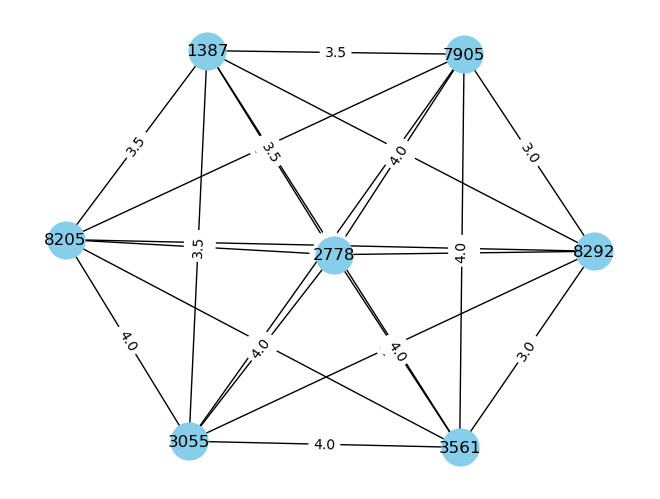

In [56]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_pyg_data(pyg_data):
    # PyTorch Geometric 데이터에서 NetworkX 그래프로 변환
    G = nx.Graph()
    edge_index = pyg_data.edge_index.numpy()
    edges = zip(edge_index[0], edge_index[1])
    G.add_edges_from(edges)
    
    # 노드 위치 결정
    pos = nx.spring_layout(G)
    
    # 노드와 엣지 그리기
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k')
    
    # 엣지 가중치 레이블 추가 (있는 경우)
    if pyg_data.edge_attr is not None:
        edge_weights = { (u, v): pyg_data.edge_attr[i].item() for i, (u, v) in enumerate(G.edges()) }
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
    plt.show()

# 첫 번째 PyTorch Geometric 데이터 시각화
if len(pyg_graphs) > 0:
    visualize_pyg_data(pyg_graphs[3521])


In [57]:
from csv2graph import csv2graph_D

# 데이터셋 경로 설정
dataset_path = 'Dataset\최종합데이터.csv'

# csv2graph_D 클래스 인스턴스 생성
csv2graph_instance = csv2graph_D(dataset_path)

# 그래프 변환 및 PyTorch Geometric 데이터로 변환
csv2graph_instance.convert_to_graph()
csv2graph_instance.convert_to_pyg_data()

# PyTorch Geometric 그래프 데이터 얻기
pyg_graphs = csv2graph_instance.get_pyg_graphs()

# 데이터셋 정보 출력
for idx, pyg_graph in enumerate(pyg_graphs):
    print(f"Graph {idx + 1}:")
    print("Number of nodes:", pyg_graph.num_nodes)
    print("Number of edges:", pyg_graph.num_edges)
    print("Node features shape:", pyg_graph.x.shape)
    print("Edge index shape:", pyg_graph.edge_index.shape)
    print("Edge attributes shape:", pyg_graph.edge_attr.shape)
    print("-" * 30)



Graph 1:
Number of nodes: 2
Number of edges: 1
Node features shape: torch.Size([2, 3])
Edge index shape: torch.Size([2, 1])
Edge attributes shape: torch.Size([1, 1])
------------------------------
Graph 2:
Number of nodes: 21
Number of edges: 210
Node features shape: torch.Size([21, 3])
Edge index shape: torch.Size([2, 210])
Edge attributes shape: torch.Size([210, 1])
------------------------------
Graph 3:
Number of nodes: 2
Number of edges: 1
Node features shape: torch.Size([2, 3])
Edge index shape: torch.Size([2, 1])
Edge attributes shape: torch.Size([1, 1])
------------------------------
Graph 4:
Number of nodes: 3
Number of edges: 3
Node features shape: torch.Size([3, 3])
Edge index shape: torch.Size([2, 3])
Edge attributes shape: torch.Size([3, 1])
------------------------------
Graph 5:
Number of nodes: 10
Number of edges: 45
Node features shape: torch.Size([10, 3])
Edge index shape: torch.Size([2, 45])
Edge attributes shape: torch.Size([45, 1])
------------------------------
Gr